<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/Oasis-Infobyte-TASK-4-Unveiling-the-Android-App-Market-Analyzing-Google-Play-Store-Data-Data-DA/blob/main/Unveiling_the_Android_App_Market_Analyzing_Google_Play_Store_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Download NLTK data for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Load the dataset
df = pd.read_csv('/content/all_combined.csv')

In [ ]:
# Data Preprocessing
# Display the first few rows of the dataframe
print(df.head())


                               reviewId  \
0  f6bb822b-c745-4e03-850c-a3672d2d5136   
1  af267c24-f183-4a5a-ab2c-2a1ca4078985   
2  39e78e1d-f057-4265-8089-95632c8e35ba   
3  839e969d-a12a-48ad-81d3-c9ccaec8af69   
4  8cb9b5cd-3aa1-4bbe-87bd-b24df5a0a61f   

                                             content  score       app  
0        excellent 👌 connect to anything more better      5  Facebook  
1                                             ❤️❤️❤️      5  Facebook  
2                                          very nice      5  Facebook  
3  So Im typically ok with the app but right now ...      2  Facebook  
4                                          Thank you      5  Facebook  


In [ ]:
# Check for missing values
print(df.isnull().sum())

reviewId     0
content     36
score        0
app          0
dtype: int64


In [ ]:
# Drop rows with missing scores or content
df.dropna(subset=['score', 'content'], inplace=True)

In [ ]:
# Convert score to int
df['score'] = df['score'].astype(int)

In [ ]:
# Sentiment Analysis on Reviews
sia = SentimentIntensityAnalyzer()
# Analyze sentiment of review content
df['sentiment'] = df['content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

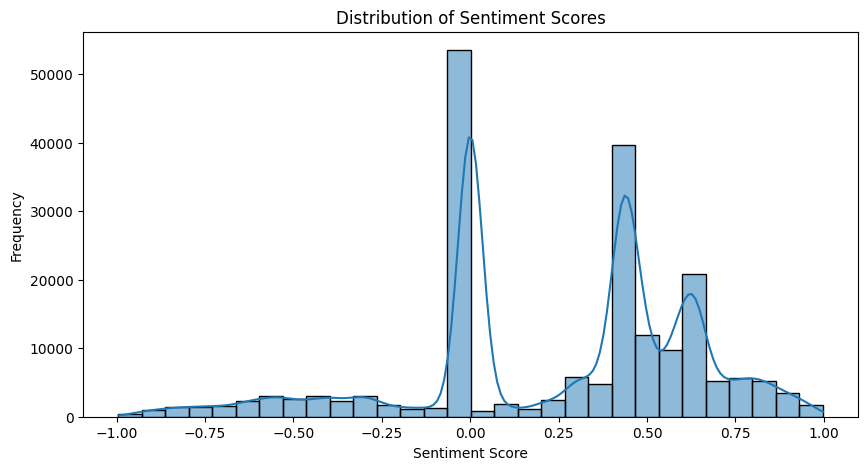

In [ ]:
# Visualizing Sentiment
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

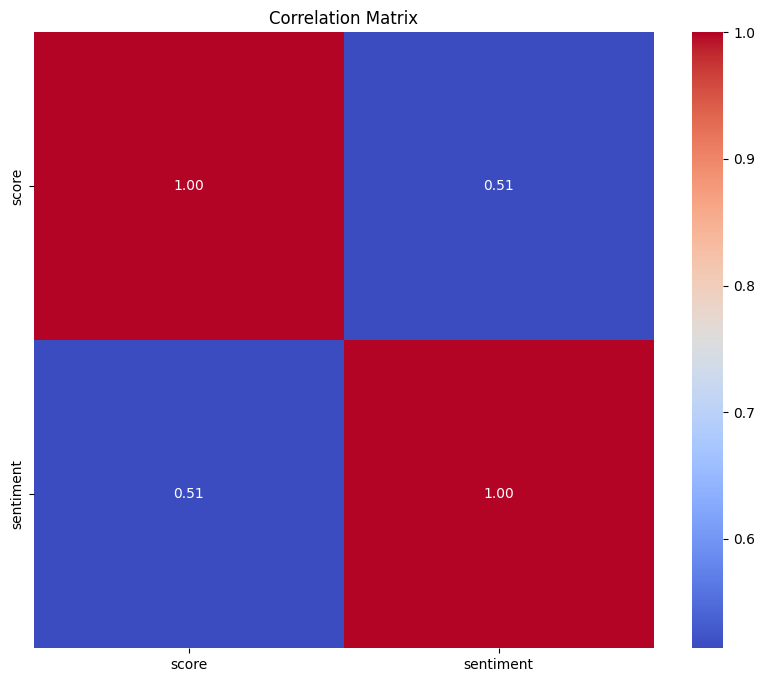

In [ ]:
# Correlation Matrix for score and sentiment
plt.figure(figsize=(10, 8))
correlation_matrix = df[['score', 'sentiment']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Machine Learning: Predicting Scores
X = df[['sentiment']]  # Features
y = df['score']  # Target

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Model Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.815898798083059
R-squared Score: 0.328679707226991


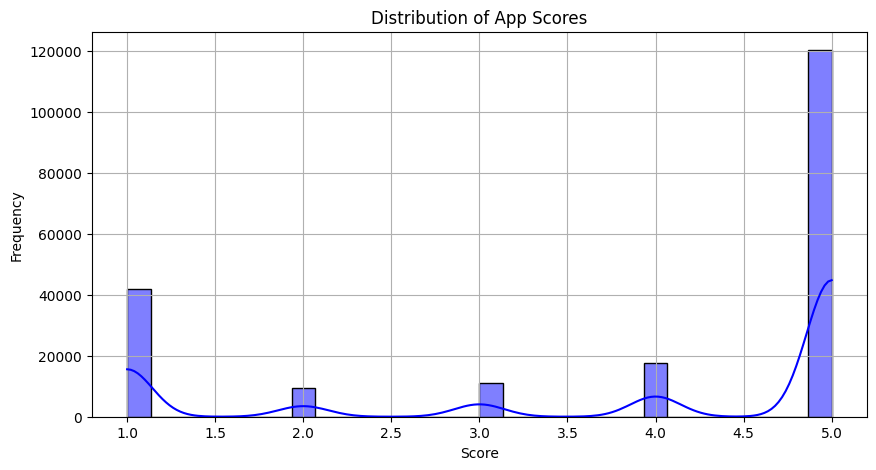

In [ ]:
# Distribution of Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['score'], bins=30, kde=True, color='blue')
plt.title('Distribution of App Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

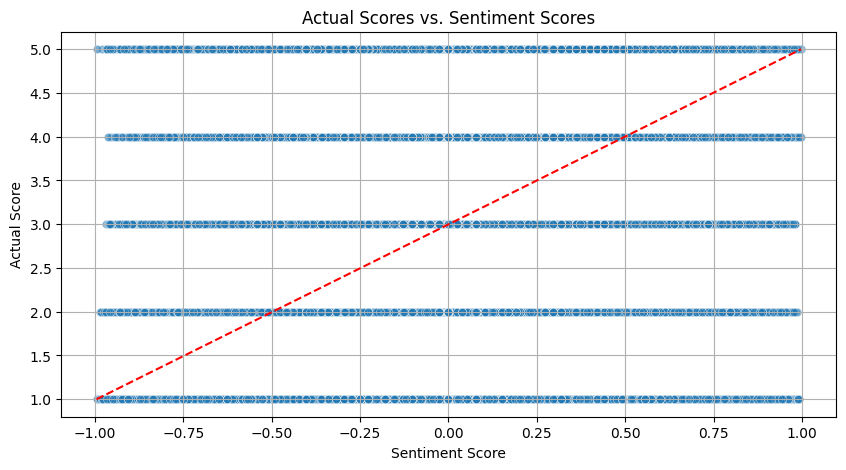

In [ ]:
# Scatter Plot: Actual vs. Predicted Scores
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['sentiment'], y=df['score'], alpha=0.6)
plt.title('Actual Scores vs. Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Actual Score')
plt.plot([df['sentiment'].min(), df['sentiment'].max()], [df['score'].min(), df['score'].max()], 'r--')  # Diagonal line for reference
plt.grid()
plt.show()

<ipython-input-30-594f51dbc0a1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emoji_counts.index, y=emoji_counts.values, palette='Set2')


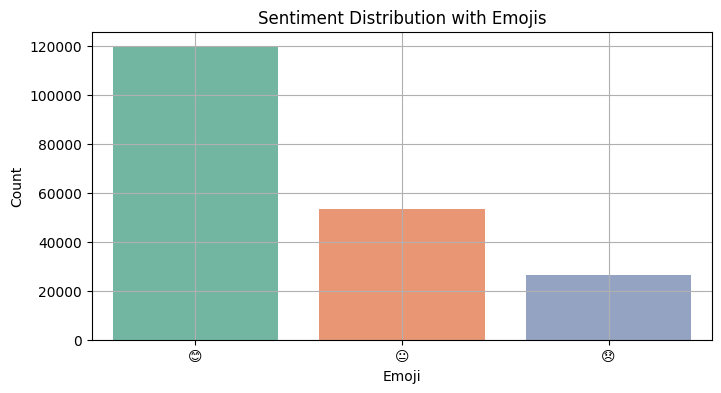

In [ ]:
# Emoji Mapping for Sentiment
def get_emoji(sentiment):
    if sentiment >= 0.05:
        return '😊'
    elif sentiment <= -0.05:
        return '😞'
    else:
        return '😐'

df['emoji'] = df['sentiment'].apply(get_emoji)

# Display sentiment with emojis
emoji_counts = df['emoji'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=emoji_counts.index, y=emoji_counts.values, palette='Set2')
plt.title('Sentiment Distribution with Emojis')
plt.ylabel('Count')
plt.xlabel('Emoji')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Random Forest Mean Squared Error: 1.815898798083059
Random Forest R-squared Score: 0.328679707226991
Gradient Boosting Mean Squared Error: 1.7983291973577944
Gradient Boosting R-squared Score: 0.3351750193640113
Linear Regression Mean Squared Error: 1.978438388563465
Linear Regression R-squared Score: 0.2685903863993663


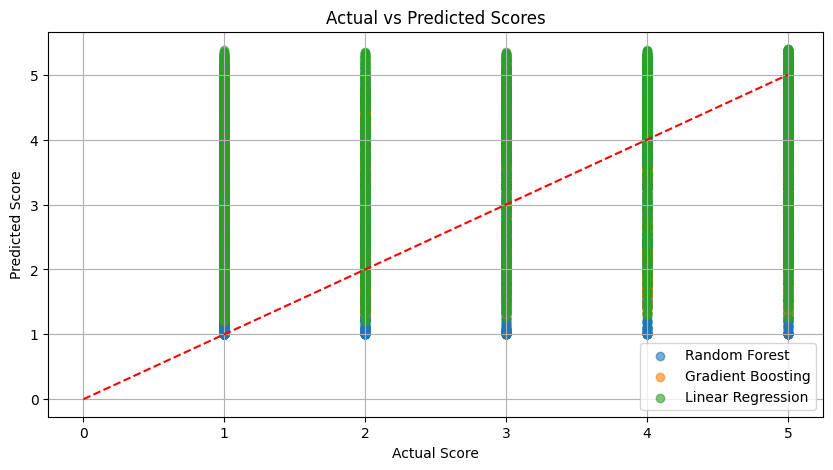

In [ ]:
# Machine Learning: Predicting Scores
X = df[['sentiment']]  # Features
y = df['score']  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

# Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_y_pred = gb_model.predict(X_test_scaled)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)

# Model Evaluation
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_y_pred))
print("Random Forest R-squared Score:", r2_score(y_test, rf_y_pred))

print("Gradient Boosting Mean Squared Error:", mean_squared_error(y_test, gb_y_pred))
print("Gradient Boosting R-squared Score:", r2_score(y_test, gb_y_pred))

print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, lr_y_pred))
print("Linear Regression R-squared Score:", r2_score(y_test, lr_y_pred))

# Actual vs. Predicted Scores for Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_y_pred, label='Random Forest', alpha=0.6)
plt.scatter(y_test, gb_y_pred, label='Gradient Boosting', alpha=0.6)
plt.scatter(y_test, lr_y_pred, label='Linear Regression', alpha=0.6)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')
plt.plot([0, 5], [0, 5], 'r--')  # Diagonal line for reference
plt.legend()
plt.grid()
plt.show()

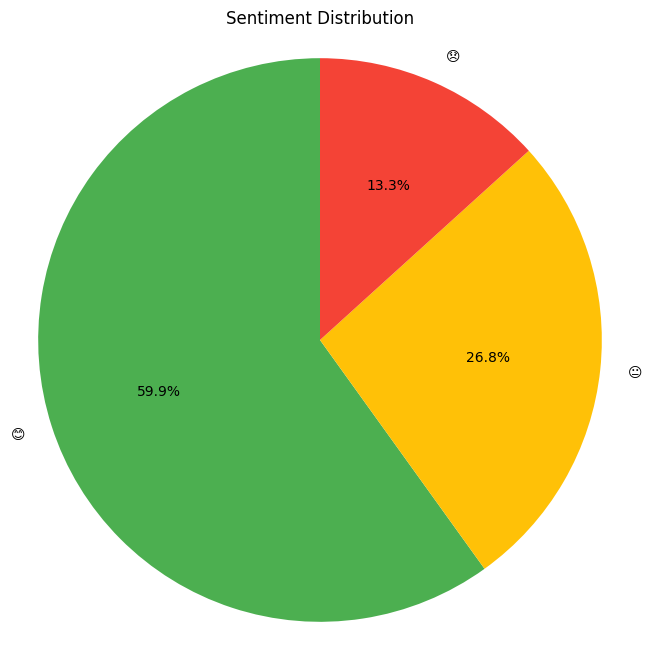

In [ ]:
#  Pie Chart for Sentiment Distribution
emoji_counts = df['sentiment'].apply(lambda x: '😊' if x >= 0.05 else '😐' if x > -0.05 else '😞').value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=emoji_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107', '#F44336'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()

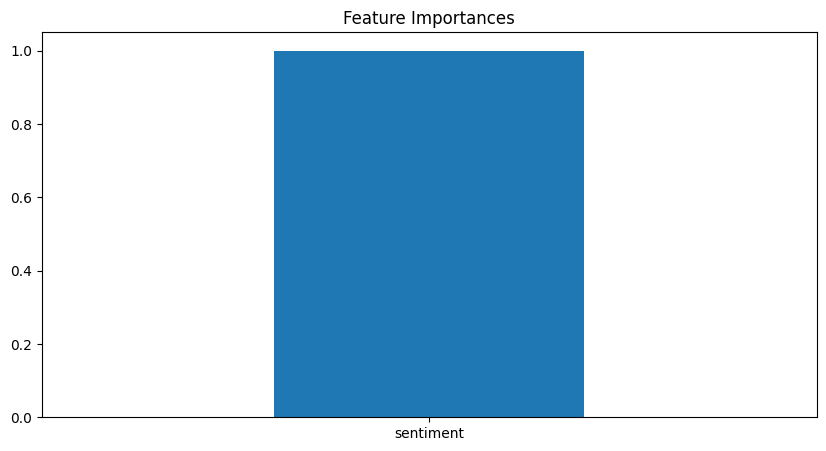

In [ ]:
# Feature Importance for Random Forest
plt.figure(figsize=(10, 5))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[indices[i]] for i in range(X.shape[1])])
plt.xlim([-1, X.shape[1]])
plt.show()


<ipython-input-4-4de733331410>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_avg_score.values, y=app_avg_score.index, palette='viridis')


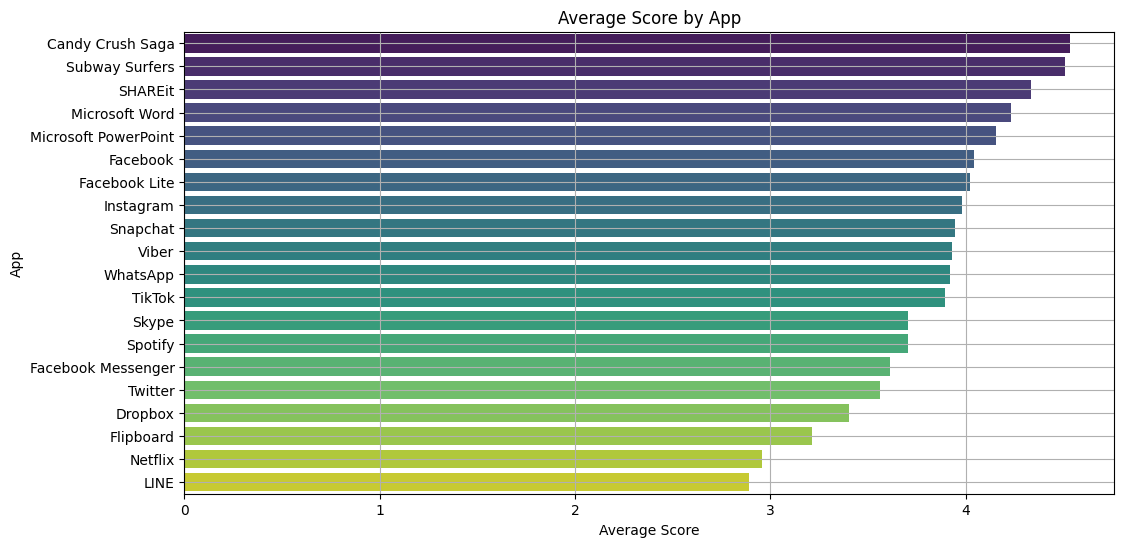

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/all_combined.csv')

# Average Score by App
plt.figure(figsize=(12, 6))
app_avg_score = df.groupby('app')['score'].mean().sort_values(ascending=False)
sns.barplot(x=app_avg_score.values, y=app_avg_score.index, palette='viridis')
plt.title('Average Score by App')
plt.xlabel('Average Score')
plt.ylabel('App')
plt.grid()
plt.show()



<ipython-input-37-0fde47f29b6b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='content', y='app', data=top_reviewed_apps, palette='rocket')


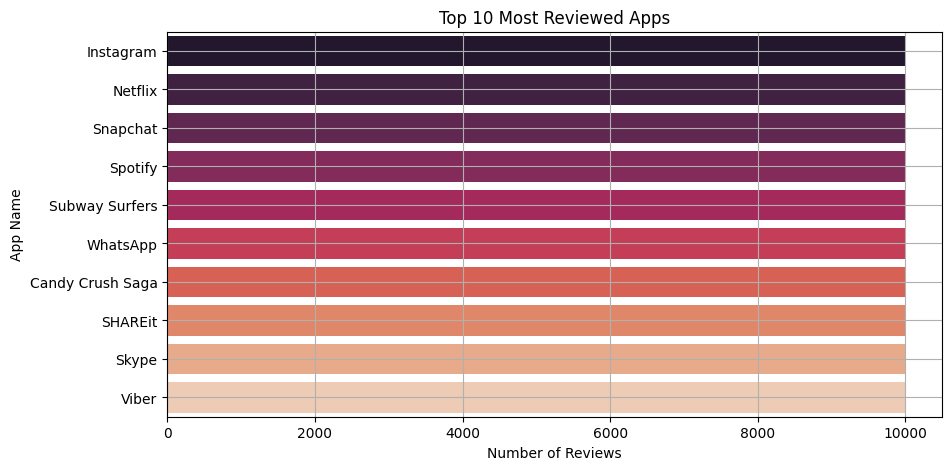

In [ ]:
# Top 10 Most Reviewed Apps
top_reviewed_apps = df.groupby('app')['content'].count().nlargest(10).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='content', y='app', data=top_reviewed_apps, palette='rocket')
plt.title('Top 10 Most Reviewed Apps')
plt.xlabel('Number of Reviews')
plt.ylabel('App Name')
plt.grid()
plt.show()

In [ ]:
print(df.columns)


Index(['reviewId', 'content', 'score', 'app', 'sentiment', 'emoji'], dtype='object')


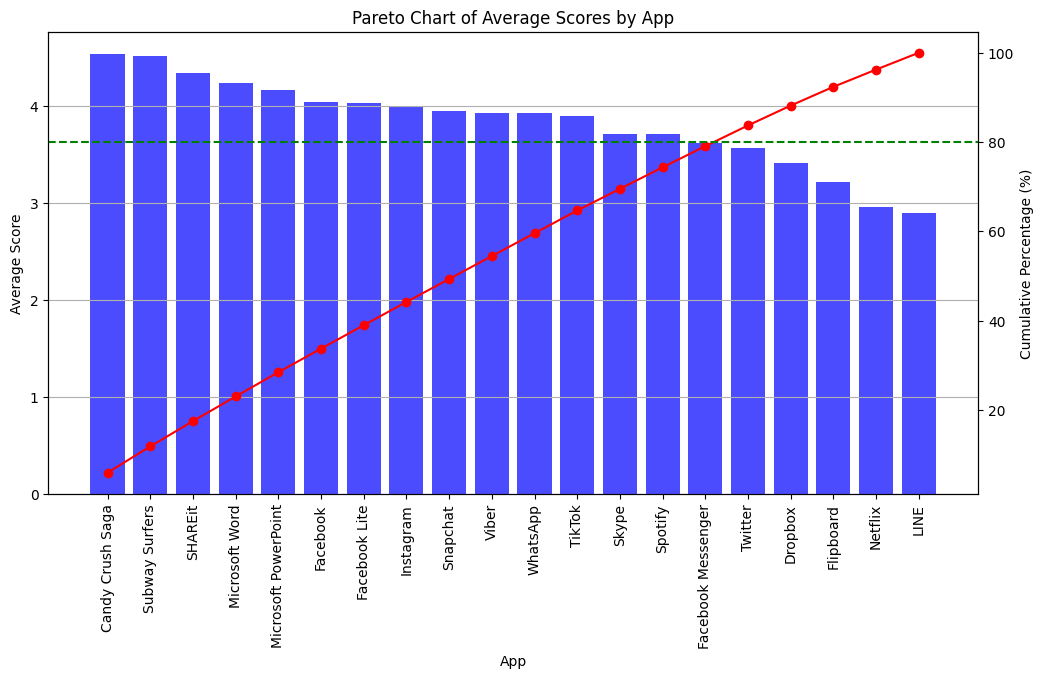

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/all_combined.csv')

# Calculate average scores by app
app_avg_score = df.groupby('app')['score'].mean().sort_values(ascending=False)

# Create Pareto Chart
plt.figure(figsize=(12, 6))
plt.bar(app_avg_score.index, app_avg_score.values, color='blue', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('App')
plt.ylabel('Average Score')
plt.title('Pareto Chart of Average Scores by App')
plt.grid(axis='y')

# Add cumulative percentage line
cumulative_percentage = app_avg_score.cumsum() / app_avg_score.sum() * 100
plt.twinx()
plt.plot(app_avg_score.index, cumulative_percentage, color='red', marker='o')
plt.ylabel('Cumulative Percentage (%)')
plt.axhline(80, color='green', linestyle='--')  # 80% line
plt.show()
